a) Concept of Image Thresholding

Image Thresholding is a simple image segmentation technique used to partition an image into foreground and background regions. It works by comparing each pixel's intensity to a predefined threshold value.

If the pixel's intensity is greater than the threshold, it's assigned a value representing the foreground (e.g., white or 255).
If the pixel's intensity is less than or equal to the threshold, it's assigned a value representing the background (e.g., black or 0).


By choosing an appropriate threshold, we can effectively highlight regions of interest (foreground) that have distinct intensity values compared to the rest of the image (background). This creates a binary image where the object is clearly separated.

Image Analysis:

Grayscale Image: The image is in grayscale, meaning each pixel has a single intensity value.
Contrast: There's a reasonable contrast between the apple and the background. The apple is generally brighter than the background.
Lighting: The lighting appears to be somewhat uneven, with slightly brighter areas in the upper left.
Object Complexity: The apple has a relatively simple shape without too many fine details.

We have Multiple method to find the right threshold
- Constant
- Otsu
- Adaptive
- Histogram

In [1]:
from IPython.display import Image

image_path = 'apple.png'
embedded_image = Image(filename=image_path)


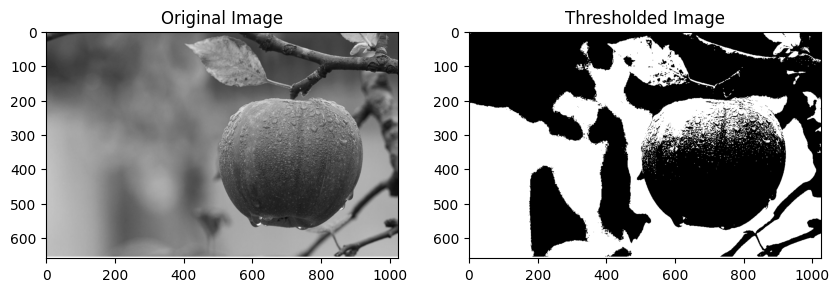

In [ ]:
# constant threshold

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_data = embedded_image.data

# Decode the image data into a NumPy array
nparr = np.frombuffer(image_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to the image
# Parameters: source image, threshold value, max value, thresholding type
_, thresholded_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

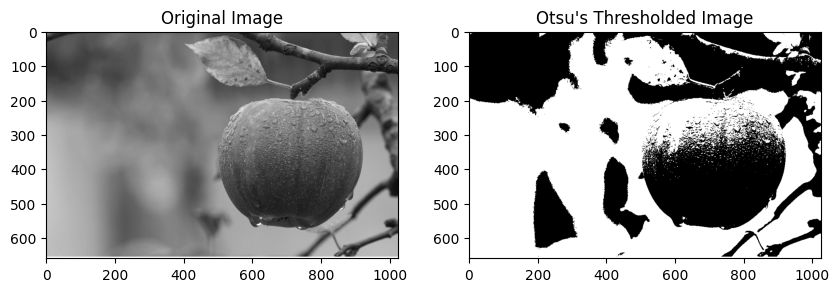

In [4]:
#otsu method

import cv2
import matplotlib.pyplot as plt

# Load the image
image_data = embedded_image.data

# Decode the image data into a NumPy array
nparr = np.frombuffer(image_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)


# Apply Otsu's thresholding
_, otsu_thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Otsu's Thresholded Image")
plt.imshow(otsu_thresholded, cmap='gray')

plt.show()

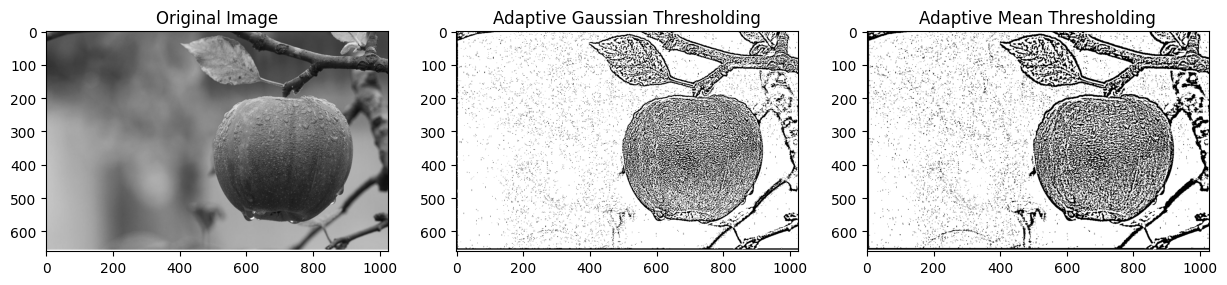

In [5]:
# Adaptive thinking

import cv2
import matplotlib.pyplot as plt

# Load the image
image_data = embedded_image.data

# Decode the image data into a NumPy array
nparr = np.frombuffer(image_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian adaptive thresholding
adaptive_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Apply Mean adaptive thresholding
adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

# Display the original and thresholded images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Adaptive Gaussian Thresholding')
plt.imshow(adaptive_gaussian, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Adaptive Mean Thresholding')
plt.imshow(adaptive_mean, cmap='gray')

plt.show()

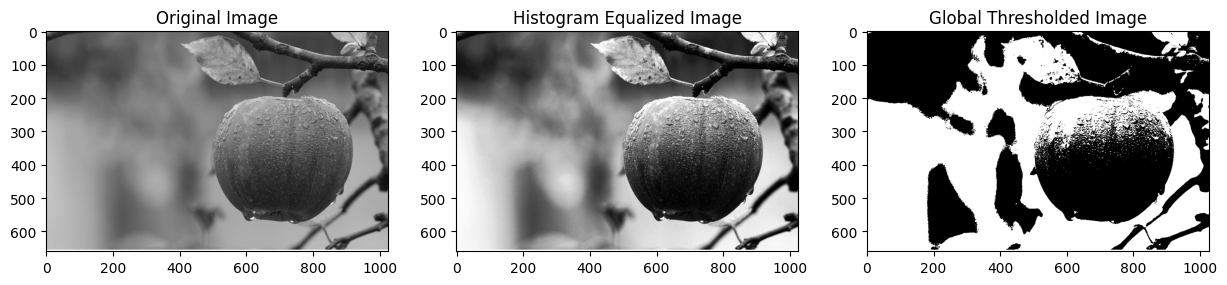

In [6]:
# Histogram
import cv2
import matplotlib.pyplot as plt

# Load the image
image_data = embedded_image.data

# Decode the image data into a NumPy array
nparr = np.frombuffer(image_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Apply a global threshold after equalization
# Choose a threshold value; you might need to experiment with different values
_, global_thresholded = cv2.threshold(equalized_image, 128, 255, cv2.THRESH_BINARY)

# Display the original, equalized, and thresholded images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Global Thresholded Image')
plt.imshow(global_thresholded, cmap='gray')

plt.show()

Q4 : Analysis
Enhancing the visual appeal of an image using brightness and contrast adjustments in OpenCV/Python can significantly improve its effectiveness and correct defects. 

Brightness:

Increase visibility: Brightening can reveal details hidden in shadows or underexposed areas.
Correct exposure issues: Balances lighting to ensure the image isn't too dark or too light.
Contrast:

Highlight differences: Enhances the distinction between elements in the image, making edges and features stand out.
Improve detail perception: Aids in identifying textures and finer details that may not be evident in low-contrast images.

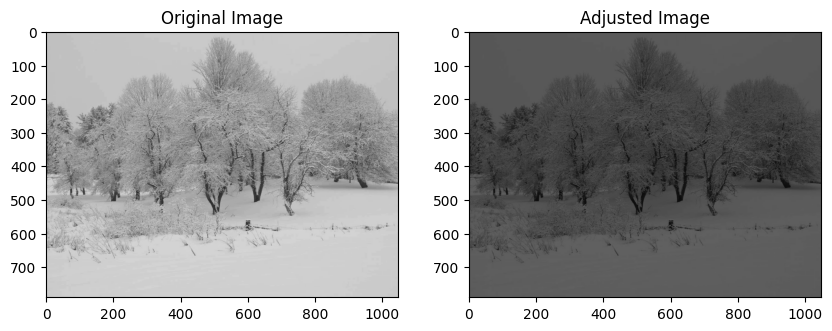

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

image_path = 'forest.png'
forest_image = Image(filename=image_path)

# Load the image
image_data = forest_image.data

# Decode the image data into a NumPy array
nparr = np.frombuffer(image_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)


# Adjust brightness (alpha) and contrast (beta)
alpha = 0.5  # Contrast control (1.0-3.0)
beta = -10    # Brightness control (0-100)

adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Display the original and adjusted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Image')

plt.show()
